**Police killing**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/sample_data/police_killings.csv",encoding="latin1")

In [5]:
data.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [6]:
data.shape

(467, 34)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  467 non-null    object 
 1   age                   467 non-null    object 
 2   gender                467 non-null    object 
 3   raceethnicity         467 non-null    object 
 4   month                 467 non-null    object 
 5   day                   467 non-null    int64  
 6   year                  467 non-null    int64  
 7   streetaddress         463 non-null    object 
 8   city                  467 non-null    object 
 9   state                 467 non-null    object 
 10  latitude              467 non-null    float64
 11  longitude             467 non-null    float64
 12  state_fp              467 non-null    int64  
 13  county_fp             467 non-null    int64  
 14  tract_ce              467 non-null    int64  
 15  geo_id                4

In [15]:
data.columns = data.columns.str.strip().str.lower()

In [17]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

cols_to_convert = [
    'share_white',
    'share_black',
    'share_hispanic',
    'p_income',
    'pov'
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [21]:
data['p_income'].describe()

,p_income
count,465.000000
mean,24308.965591
std,9021.772844
min,5457.000000
25%,18257.000000
50%,22348.000000
75%,28556.000000
max,86023.000000


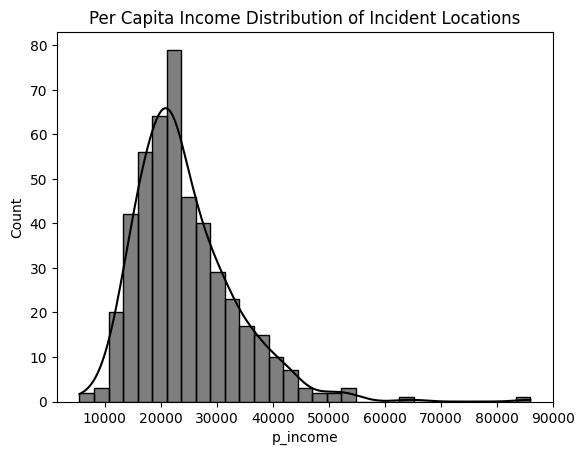

In [23]:
sns.histplot(data['p_income'], kde=True,color='black')
plt.title("Per Capita Income Distribution of Incident Locations")
plt.show()

In [24]:
data.groupby('raceethnicity')['share_black'].mean()

,share_black
raceethnicity,
Asian/Pacific Islander,14.720000
Black,39.040602
Hispanic/Latino,8.700000
Native American,5.950000
Unknown,6.260000
White,9.761017


In [26]:
pd.crosstab(
    pd.qcut(data['p_income'], 4),
    data['armed'],
    normalize='index'
)

armed,Disputed,Firearm,Knife,No,Non-lethal firearm,Other,Unknown,Vehicle
p_income,,,,,,,,
"(5456.999, 18257.0]",0.000000,0.572650,0.102564,0.213675,0.025641,0.042735,0.000000,0.042735
"(18257.0, 22348.0]",0.000000,0.491379,0.198276,0.189655,0.008621,0.068966,0.017241,0.025862
"(22348.0, 28556.0]",0.008621,0.448276,0.120690,0.224138,0.051724,0.077586,0.017241,0.051724
"(28556.0, 86023.0]",0.000000,0.456897,0.163793,0.250000,0.034483,0.034483,0.025862,0.034483


In [27]:
data['college'].describe()

,college
count,465.000000
mean,0.220217
std,0.158347
min,0.013547
25%,0.106167
50%,0.169544
75%,0.284542
max,0.828070


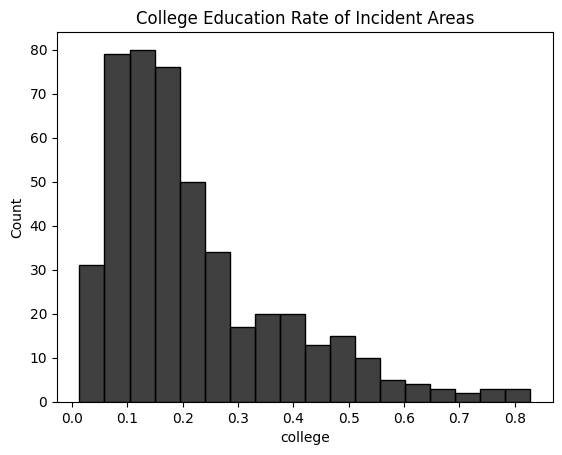

In [28]:
sns.histplot(data['college'],color='black')
plt.title("College Education Rate of Incident Areas")
plt.show()